<div style="color: magenta; font-family: Arial; font-size: 26px; font-weight: bold;">
    Sprint 8.01
</div>
<br>

**Visualitzacions en Python**
<br>
<br>

<div style="color: magenta; font-family: Arial; font-size: 20px; font-weight: bold;">
    Nivel 1
</div>
<br>
Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

*Pasos:*

1. Conectar Python y MySQL Workbench: Se ejecuta el comando "pip install mysql-connector-python" para instalar el conector "mysql-connector-python". 
2. Establecemos una conexion con la base de datos atraves de una función en python logramos extraer de forma innata las tablas y datos según el orden de origen, el mismo codigo provee el cierre de conexión para segurar el consumo adicional de recursos.

In [1]:
import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(host='localhost',
                                         database='sprint4',
                                         user='root',
                                         password='7829')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")


Connected to MySQL Server version  8.0.39
You're connected to database:  ('sprint4',)
MySQL connection is closed


3. Instalamos las librerías en la terminal y las importamos:  

pip install pandas  
pip install numpy  
pip install seaborn  
pip install matplotlib  
pip install sqlalchemy

In [2]:
# Importamos las liberías:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy 


In [3]:
# Importamos las tablas:
import mysql.connector
db = mysql.connector.connect(host='localhost',
                            database='sprint4',
                            user='root',
                            password='7829')


def load_table_to_dataframe(db, cursor, table_name):             # Cargo c/tabla en un Pandas DataFrame.                                                     
    try:
        df = pd.DataFrame()                                      # Creo un DataFrame vacío para la tabla
        cursor.execute(f"SELECT * FROM {table_name}")            # Ejecuto la consulta para extraer tablas
        column_names = [col[0] for col in cursor.description]    # Obtengo los nombres de las columnas
        data = cursor.fetchall()
        data_list = []                                           # Convierto los datos a un formato Dataframe
        for row in data:
            data_list.append(list(row))
        df = pd.DataFrame(data_list, columns=column_names)       # Creo el DataFrame (datos y nombres de columnas)
        return df
    except Exception as e:
        print(f"Error loading table '{table_name}':", e)
        return None

cursor = db.cursor()
cursor.execute("SHOW TABLES")
tables = [tabla[0] for tabla in cursor.fetchall()]

for table_name in tables:
    df_name = f"df_{table_name.lower()}"  # Convierto el nombre de la tabla a minúsculas con prefijo 'df_'
    df = load_table_to_dataframe(db, cursor, table_name)
    if df is None:
        continue

    globals()[df_name] = df  # Creo una variable global con el nombre dinámico y configuro en el DataFrame
    print(f"DataFrame: {df_name}")  # Imprimo el nombre del DataFrame
    
cursor.close()  # Desconexión
db.close()


DataFrame: df_card_status
DataFrame: df_companies
DataFrame: df_credit_cards
DataFrame: df_products
DataFrame: df_transaction_products
DataFrame: df_transactions
DataFrame: df_users


In [37]:
# Para verificar si los datos están cargados, verifico la estructura de 'products':

df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            100 non-null    object
 1   product_name  100 non-null    object
 2   price         100 non-null    object
 3   colour        100 non-null    object
 4   weight        100 non-null    object
 5   warehouse_id  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [54]:
# Probando visualizaciones

df_products

,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,161.11,#7c7c7c,1,WH-4
1,10,Karstark Dorne,119.52,#f4f4f4,2.4,WH--5
2,100,south duel,40.43,#6d6d6d,3,WH--95
3,11,Karstark Dorne,49.70,#141414,2.7,WH--6
4,12,duel Direwolf,181.60,#a8a8a8,2.1,WH--7
...,...,...,...,...,...,...
95,95,riverlands north Direwolf,6.90,#c1c1c1,2.7,WH--90
96,96,dooku solo,20.92,#282828,2.1,WH--91
97,97,jinn Winterfell,65.25,#bababa,1,WH--92
98,98,Direwolf Littlefinger,38.33,#bababa,2,WH--93


In [38]:
# Resumen de la estructura de 'transactions':

df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    object        
 5   declined     587 non-null    int64         
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    int64         
 8   lat          587 non-null    float64       
 9   longitude    587 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 46.0+ KB


In [51]:
# Primeras filas de 'transaction_products':

df_transaction_products.head()

,id,transaction_id,product_id
0,1,2F499B4D-4DC7-B337-010D-8B7471812A80,1
1,2,6ADF86D5-DD32-BC6F-D157-8C836F5BEF67,1
2,3,D3470F3E-9683-799A-40F1-E42C143BAC5A,1
3,4,EAE19DC1-C847-6D79-673D-00E7696AC336,1
4,5,CDCDE7A5-39CD-9ABD-59D5-71641582C825,1


<div style="color: magenta; font-family: Arial; font-size: 20px; font-weight: bold;">
    Nivel 1
</div>
<br>
<div style="color: magenta; font-family: Arial; font-size: 16px; font-weight: bold;">
    Ejercicio 1
</div>

**Una variable numèrica**

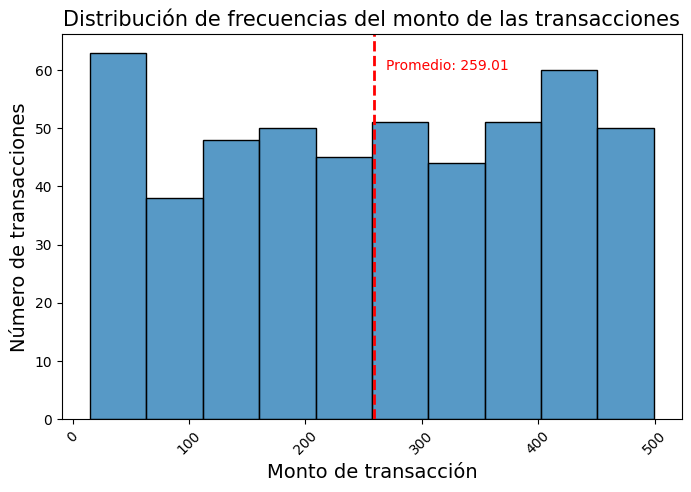

In [ ]:

df_histogram = df_transactions[df_transactions['declined'] == 0]
amount = df_histogram['amount']

plt.figure(figsize=(8, 5))
sns.histplot(data=amount)

plt.title("Distribución de frecuencias del monto de las transacciones", fontsize=15)
plt.xlabel('Monto de transacción', fontsize=14)        
plt.ylabel('Número de transacciones', fontsize=14)          
mean_value = amount.mean()                                 
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2)             
plt.text(mean_value + 10, 60, f'Promedio: {mean_value:.2f}', color='red')   
plt.xticks(rotation=45, ha='center')

plt.show()

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que la columna de fecha esté en formato datetime
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

# Agrupa las transacciones por fecha y cuenta el número de transacciones por día
transacciones_por_fecha = df_transactions.groupby(df_transactions['date'].dt.date).size()

# Configura el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crea el gráfico de líneas
sns.lineplot(x=transacciones_por_fecha.index, y=transacciones_por_fecha.values, marker='o')

# Añade títulos y etiquetas
plt.title('Tendencia de transacciones a lo largo del tiempo', fontsize=15)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Número de transacciones', fontsize=14)

# Rotar etiquetas del eje x para mejor legibilidad si es necesario
plt.xticks(rotation=45, ha='right')

# Muestra el gráfico
plt.show()



KeyError: 'date'

<div style="color: magenta; font-family: Arial; font-size: 20px; font-weight: bold;">
    Nivel 1
</div>
<br>
<div style="color: magenta; font-family: Arial; font-size: 16px; font-weight: bold;">
    Ejercicio 2
</div>

**Dues variables numèriques.**